# 2. Linear Algebra (II)

In [15]:
import numpy as np
import pandas as pd
import sympy as sp

from IPython.display import display, Math, Markdown
from utils import *

In [16]:
# Create an instance of the MatrixWriter class
writer = MatrixWriter()

## 2.3. Identity and Inverse Matrices

**Identity Matrix** $\rightarrow \mathbf{I}_n \in \mathbb{R}^{n \times n}$ 

$\forall \boldsymbol{x} \in \mathbb{R}^n,~\mathbf{I}_n\boldsymbol{x}=\boldsymbol{x}$

**Matrix Inverse** of $\mathbf{A} \rightarrow \mathbf{A}^{-1}$ such that $\mathbf{A}^{-1}\mathbf{A}=\mathbf{I}_n$ 

In [49]:
# Generate a random 3x3 matrix with integer values between 0 and 9
A = np.random.randint(0, 9, size=9).reshape(3, 3)

# Calculate the inverse of matrix A using numpy's linear algebra module
A_inv = np.linalg.inv(A)

# Display the matrix A and its inverse A_inv in LaTeX format using Markdown
display(Markdown(
    f'Given a random square matrix $\\mathbf{{A}}$ ' 
    f'$={writer(A)}$ '                               
    f'return the matrix $\\mathbf{{A}}^{{-1}}={writer(A_inv)}$ satisfying:'
))

# Multiply the inverse of A by A to approximate the identity matrix
identity_approx = A_inv @ A

# Check if the approximate identity matrix is close to the actual identity matrix
np.allclose(identity_approx, np.eye(3))

# Round the elements of the approximate identity matrix to the nearest integer
I = np.round(identity_approx).astype(int)

# Display the original matrix A, its inverse A_inv, and their product I in LaTeX format using Markdown
display(Markdown(f'${writer(A)}\cdot{writer(A_inv)}={writer(I)}$'))

Given a random square matrix $\mathbf{A}$ $=\begin{bmatrix} 5 & 5 & 6\\
3 & 3 & 4\\
4 & 5 & 6 \end{bmatrix}$ return the matrix $\mathbf{A}^{-1}=\begin{bmatrix} 1 & 0 & -1\\
1 & -3 & 1\\
- \frac{3}{2} & \frac{5}{2} & 0 \end{bmatrix}$ satisfying:

$\begin{bmatrix} 5 & 5 & 6\\
3 & 3 & 4\\
4 & 5 & 6 \end{bmatrix}\cdot\begin{bmatrix} 1 & 0 & -1\\
1 & -3 & 1\\
- \frac{3}{2} & \frac{5}{2} & 0 \end{bmatrix}=\begin{bmatrix} 1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1 \end{bmatrix}$

## 2.4. Linear dependence and Span

$\mathbf{A}\boldsymbol{x}=\boldsymbol{b}$

**The most likely case:** the determinant of $\mathbf{A}$ is nonzero

 $\mathbf{A}\boldsymbol{x} = \displaystyle\sum_{i}x_iA_{:,i}$

 $
\mathbf{A}\boldsymbol{x} = x_1 \cdot \begin{bmatrix}
A_{1,1} \\
A_{2,1} \\
\vdots \\
A_{m,1}
\end{bmatrix} + 
x_2 \cdot \begin{bmatrix}
A_{1,2} \\
A_{2,2} \\
\vdots \\
A_{m,2}
\end{bmatrix} + \cdots +
x_n \cdot \begin{bmatrix}
A_{1,n} \\
A_{2,n} \\
\vdots \\
A_{m,n}
\end{bmatrix}
$

Each element of $\boldsymbol{x}$ speciﬁes how far we should travel in each of the different directions especified by columns of $\mathbf{A}$, with $x_i$ specifying how far to move in the direction of column $i$.

This type of operation is known as a **linear combination**:

The linear combination of some set of vectors: $\{\boldsymbol{v}^{(1)}, \dots, \boldsymbol{v}^{(n)}\}$ is given by: $\displaystyle\sum_{i}c_{i}\boldsymbol{v}^{(i)}$
- Let $\mathbf{A}$ be an $m \times n$ matrix.
- Let $\boldsymbol{b}$ be a vector in $\mathbb{R}^m$.
- The vector space generated by the columns of $\mathbf{A}$ is the $\textit{column space}$ of $\mathbf{A}$, denoted $\text{Col}(\mathbf{A})$.

If $\boldsymbol{b}$ is in the span of $\mathbf{A}$, i.e., $\boldsymbol{b} \in \text{Col}(\mathbf{A})$, then the system $\mathbf{A}\boldsymbol{x} = \boldsymbol{b}$ has a solution. This is equivalent to saying that if $\boldsymbol{b}$ is a linear combination of the columns of $\mathbf{A}$, then there exists a solution $\boldsymbol{x}$ to the system $\mathbf{A}\boldsymbol{x} = \boldsymbol{b}$.

In [58]:
import numpy as np

# Definir la matriz A
A = np.array([[2, -1],
              [1, 1]])

# Definir el vector b
b = np.array([7, -1])

# Resolver el sistema de ecuaciones A @ x = b
x = np.linalg.solve(A, b)
if np.allclose(np.dot(A, x), b):
    display(Markdown(
        f'$\\boldsymbol{{x}}=$ ' 
        f'${writer(x)}$ '                               
    ))




$\boldsymbol{x}=$ $\begin{bmatrix} 2\\
-3 \end{bmatrix}$ 

In [70]:
import numpy as np

# Definir la matriz A
A = np.array([[2, -1, 4],
              [1, 1, 1]])

# Definir el vector b
b = np.array([7, -1])

# Resolver el sistema d_e ecuaciones A @ x = b
x = np.linalg.lstsq(A, b, rcond=None)[0]
if np.allclose(np.dot(A, x), b):
    display(Markdown(
        f'$\\boldsymbol{{x}}=$ ' 
        f'$\\frac{{1}}{{19}}{writer(19*x)}$ '                               
    ))

print(x)

$\boldsymbol{x}=$ $\frac{1}{19}\begin{bmatrix} -2\\
-41\\
24 \end{bmatrix}$ 

[-0.10526316 -2.15789474  1.26315789]


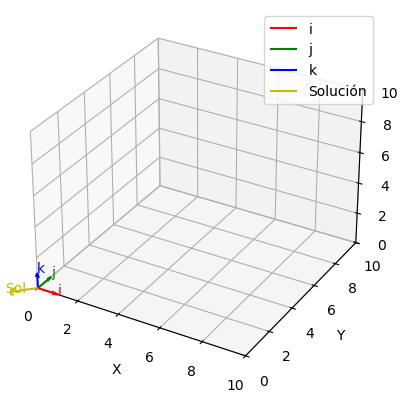

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la matriz A
A = np.array([[2, -1, 4],
              [1, 1, 1]])

# Definir el vector b
b = np.array([7, -1])

# Resolver el sistema de ecuaciones A @ x = b
x = np.linalg.lstsq(A, b, rcond=None)[0]

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Origen
origin = np.array([0, 0, 0])

# Vectores de la base
i = np.array([1, 0, 0])
j = np.array([0, 1, 0])
k = np.array([0, 0, 1])

# Solución del sistema
sol = x

# Graficar los ejes
ax.quiver(*origin, *i, color='r', label='i')
ax.quiver(*origin, *j, color='g', label='j')
ax.quiver(*origin, *k, color='b', label='k')

# Graficar la solución del sistema
ax.quiver(*origin, *sol, color='y', label='Solución')

# Anotaciones y leyenda
ax.text(*i, 'i', color='r')
ax.text(*j, 'j', color='g')
ax.text(*k, 'k', color='b')
ax.text(*sol, 'Sol', color='y')
ax.legend()

# Establecer límites de los ejes
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])

# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


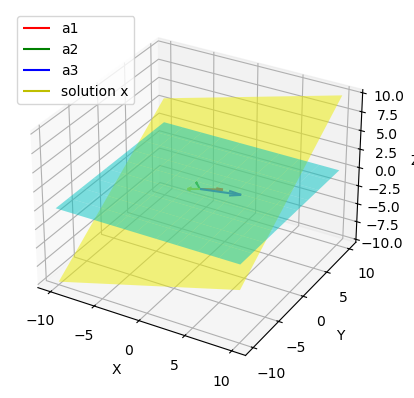

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Definir el plano generado por a1 y a2
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 10)
X, Y = np.meshgrid(x, y)
Z = (X + 2*Y) / 3  # Ecuación aproximada del plano generado por las columnas de A

# Graficar el plano
ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100, color='yellow')

# Graficar el plano xy
Z_xy = np.zeros_like(X)
ax.plot_surface(X, Y, Z_xy, alpha=0.5, color='cyan')

# Graficar los vectores a1, a2, a3
a1 = np.array([2, 1, 0])
a2 = np.array([-1, 1, 0])
a3 = np.array([4, 1, 0])
ax.quiver(0, 0, 0, a1[0], a1[1], a1[2], color='r', label='a1')
ax.quiver(0, 0, 0, a2[0], a2[1], a2[2], color='g', label='a2')
ax.quiver(0, 0, 0, a3[0], a3[1], a3[2], color='b', label='a3')

# Graficar el vector solución x
solution = np.array([-0.10526316, -2.15789474, 1.26315789])
ax.quiver(0, 0, 0, solution[0], solution[1], solution[2], color='y', label='solution x')

# Configurar los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Añadir leyenda
ax.legend()

# Mostrar el gráfico
plt.show()
